# Project 1 — Adult Income (Census)
## Supervised Learning

**Task:** Binary classification — income ≤50K vs >50K  
**Metrics:** F1, Accuracy; PR-AUC for threshold-based results  
**Workflow:** EDA → Hypotheses → Train/tune (DT, kNN, SVM, NN-sklearn, NN-PyTorch) → Interpretation → Conclusion

---
## 1. Setup and data loading

In [1]:
import sys
from config import RANDOM_SEED, DATA_PATH, TARGET_COLUMN
from utils import set_seed
from data_loading import load_adult, get_target_and_features

set_seed()
# Load and inspect
df = load_adult()
X, y = get_target_and_features(df)
print(df.shape)
print(y.value_counts())

Removed 47 duplicate row(s). Dataset: 45222 -> 45175 rows.
(45175, 15)
class
<=50K    33973
>50K     11202
Name: count, dtype: int64


---
## 2. Exploratory Data Analysis (EDA)

Class distribution, basic stats, plots. Ground for hypotheses.


First 5 rows:
     age  workclass    fnlwgt     education  education-num      marital-status  \
0  25.0    Private  226802.0          11th            7.0       Never-married   
1  38.0    Private   89814.0       HS-grad            9.0  Married-civ-spouse   
2  28.0  Local-gov  336951.0    Assoc-acdm           12.0  Married-civ-spouse   
3  44.0    Private  160323.0  Some-college           10.0  Married-civ-spouse   
4  34.0    Private  198693.0          10th            6.0       Never-married   

          occupation   relationship   race   sex  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black  Male           0.0           0.0   
1    Farming-fishing        Husband  White  Male           0.0           0.0   
2    Protective-serv        Husband  White  Male           0.0           0.0   
3  Machine-op-inspct        Husband  Black  Male        7688.0           0.0   
4      Other-service  Not-in-family  White  Male           0.0           0.0   

   hours-per-wee

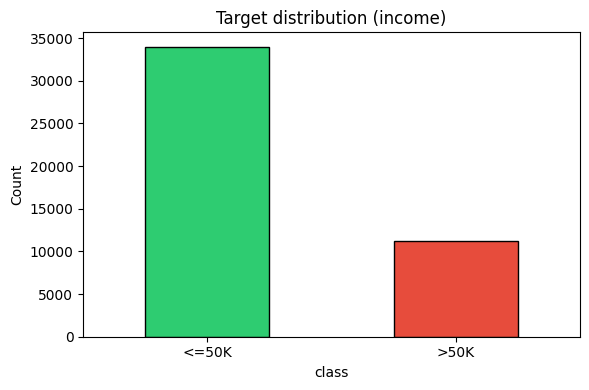

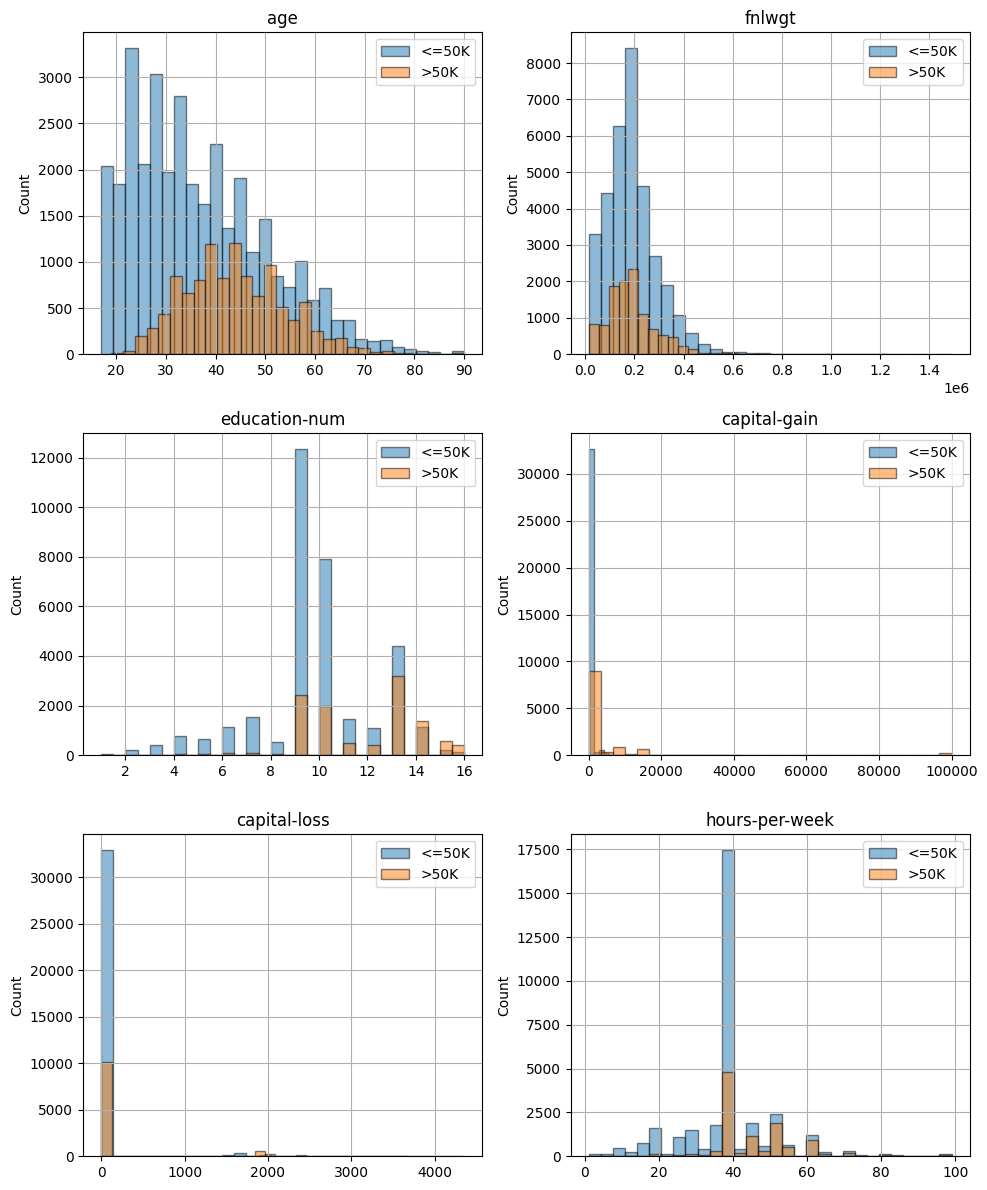


Correlation of numeric features with target (income >50K = 1):
------------------------------------------------------------
  fnlwgt              : -0.0072
  capital-loss        :  0.1487
  capital-gain        :  0.2211
  hours-per-week      :  0.2271
  age                 :  0.2368
  education-num       :  0.3330


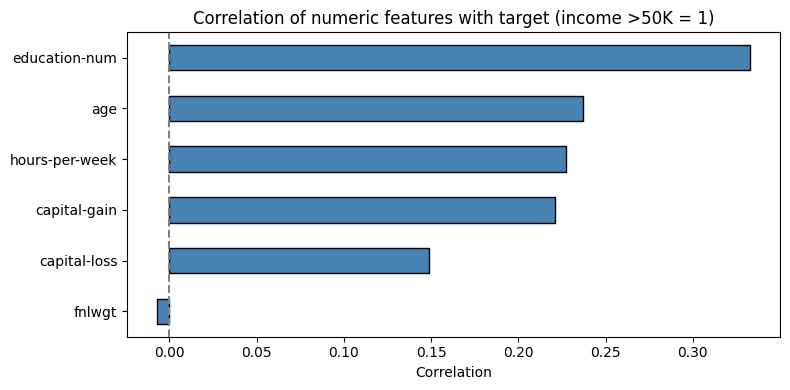


Correlation matrix (numeric features):
------------------------------------------------------------
                     age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
age             1.000000 -0.075590       0.037269      0.079649      0.059258        0.101604
fnlwgt         -0.075590  1.000000      -0.041992     -0.004118     -0.004359       -0.018712
education-num   0.037269 -0.041992       1.000000      0.126982      0.081719        0.146463
capital-gain    0.079649 -0.004118       0.126982      1.000000     -0.032137        0.083868
capital-loss    0.059258 -0.004359       0.081719     -0.032137      1.000000        0.054141
hours-per-week  0.101604 -0.018712       0.146463      0.083868      0.054141        1.000000


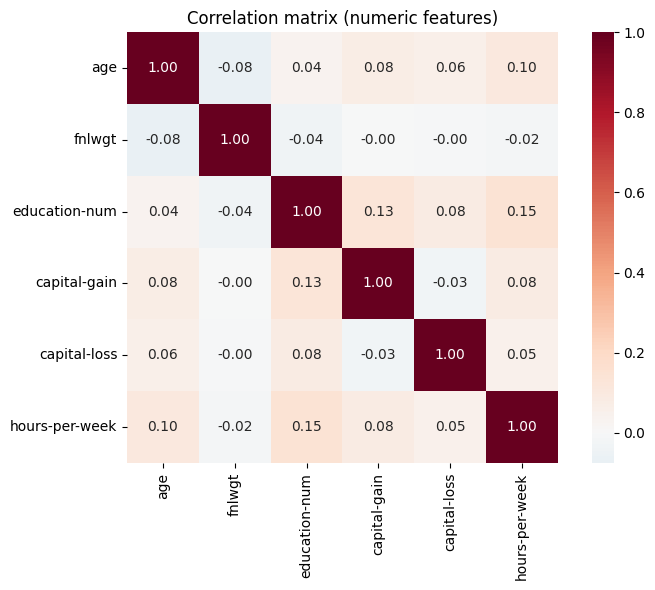

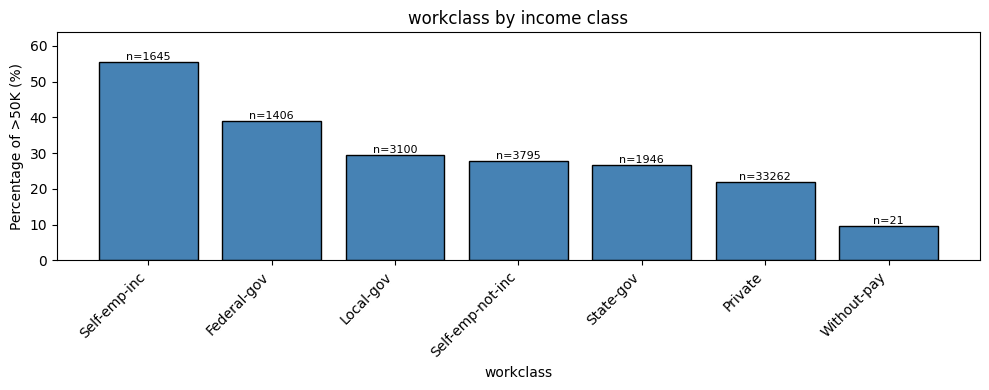

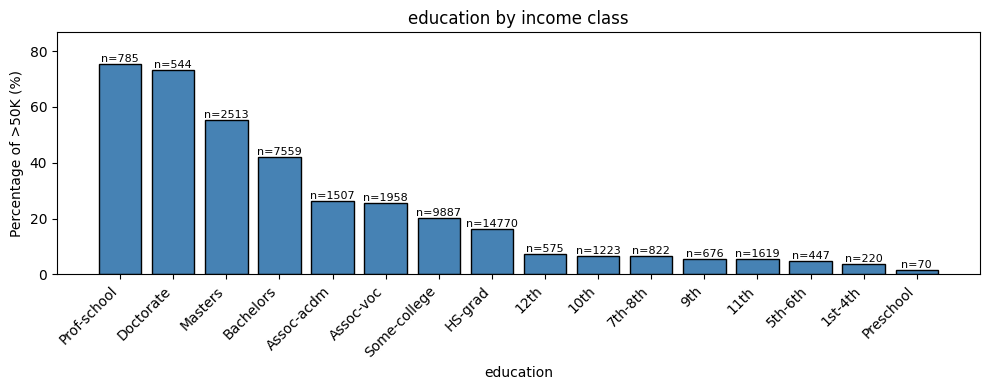

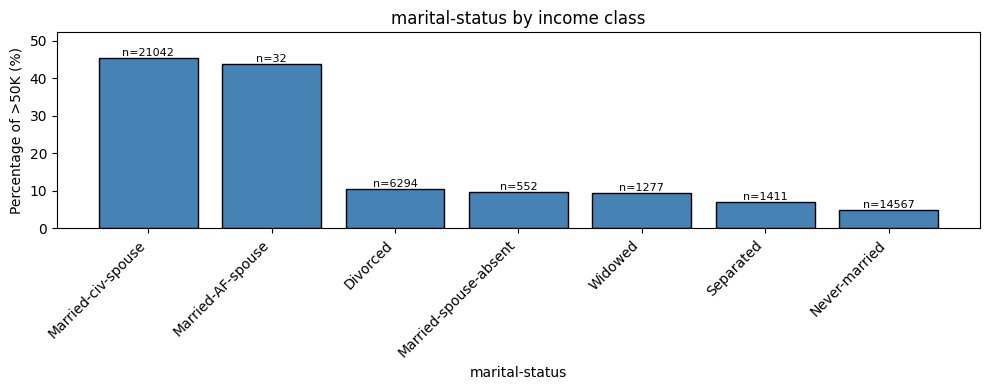

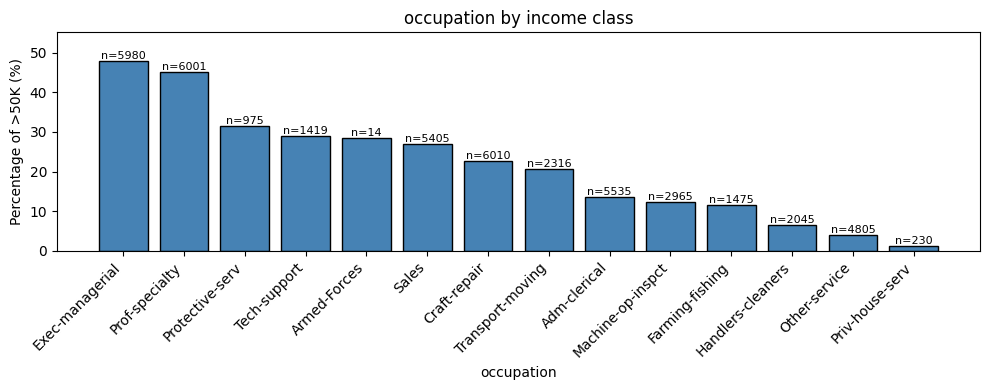

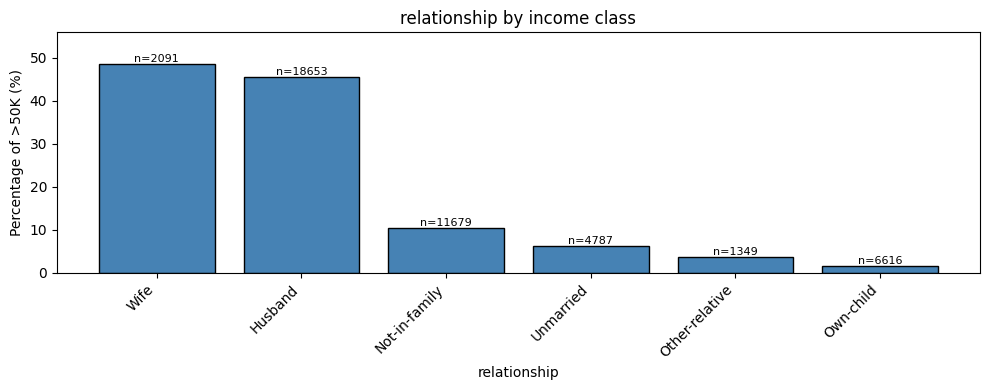

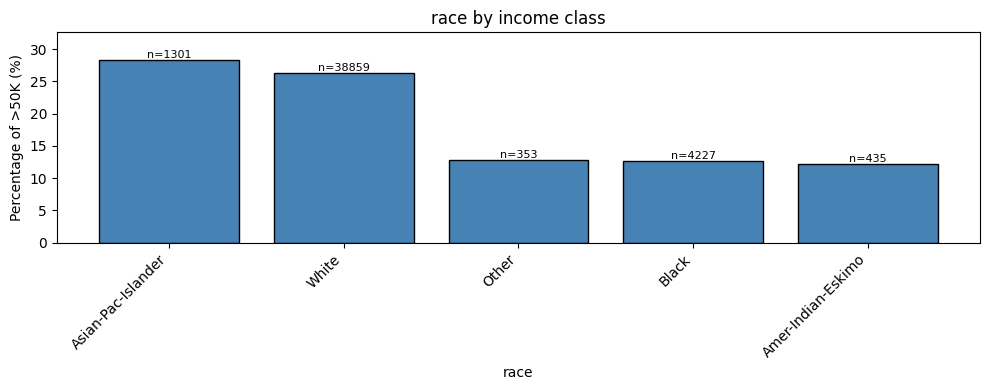

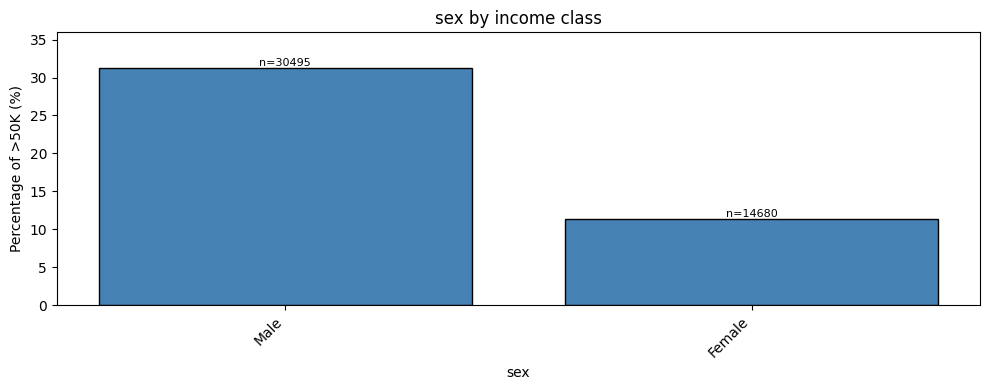

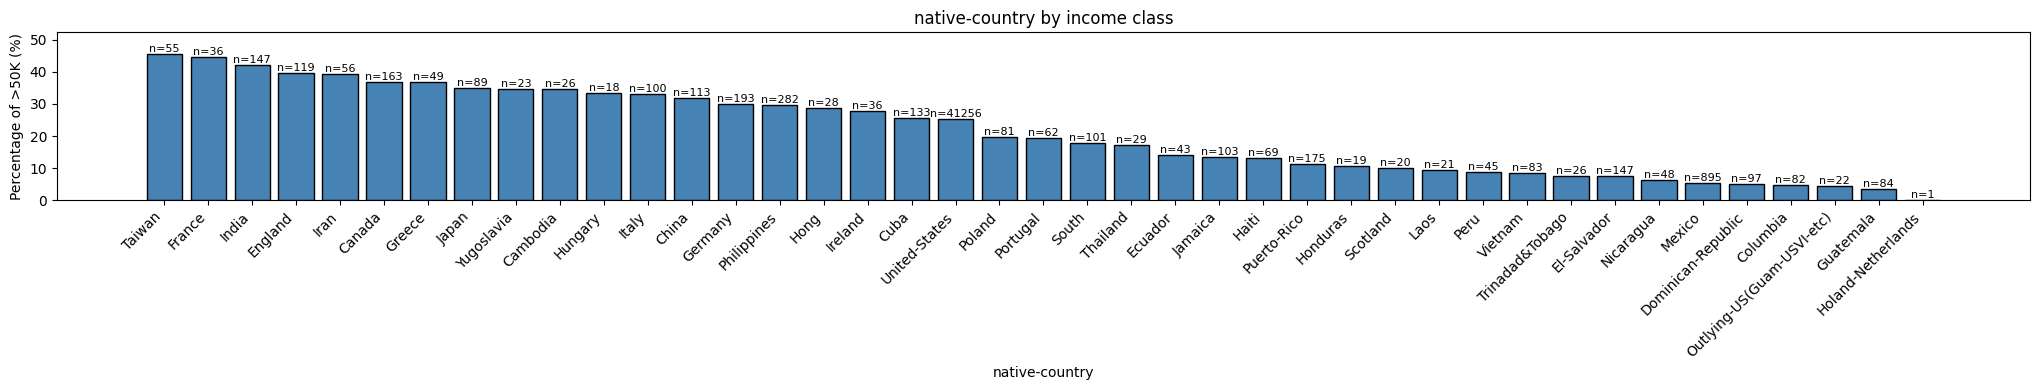


EDA complete.

EDA results saved to: /home/ubuntu/ml-supervised-project1/EDA_RESULTS.txt


{'numeric_cols': ['age',
  'fnlwgt',
  'education-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'],
 'categorical_cols': ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country']}

In [2]:
from eda import run_eda

# Run full EDA: class distribution, missing/dtypes, numeric & categorical summaries, plots
# Figures are saved to outputs/
run_eda(df, save_figures=True)


*Write your hypotheses here (paragraph form).*

---
## 4. Preprocessing and leakage controls

Single train/test split; tuning via CV on training only. State what was removed/verified for leakage.

In [2]:
from preprocessing import get_dataset

X_train, y_train, X_test, y_test = get_dataset()
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")
print(f"Total input features (columns) after preprocessing: {X_train.shape[1]}")

Removed 47 duplicate row(s). Dataset: 45222 -> 45175 rows.
Train: 36140, Test: 9035
Total input features (columns) after preprocessing: 41


## Baseline models

Run all baseline models (DummyClassifier, DecisionTree, SVM linear/RBF, NN-sklearn, NN-PyTorch) and write results to `baseline_results.txt`.

In [3]:
from baseline import run_baselines

# Run baselines and print results; also writes to baseline_results.txt
run_baselines()

Removed 47 duplicate row(s). Dataset: 45222 -> 45175 rows.

--- DummyClassifier ---
Hyperparameters: strategy='stratified', random_state=42
CV (train): Accuracy=0.6294, F1=0.2507, PR-AUC=0.2489
Test:       Accuracy=0.6351, F1=0.2522, PR-AUC=0.2500

--- DecisionTree ---
Hyperparameters: max_depth=10, random_state=42
CV (train): Accuracy=0.8535, F1=0.6661, PR-AUC=0.7577
Test:       Accuracy=0.8548, F1=0.6690, PR-AUC=0.7677


c:\Users\yazma\micromamba\envs\sy32\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\yazma\micromamba\envs\sy32\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\yazma\micromamba\envs\sy32\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\yazma\micromamba\envs\sy32\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\yazma\m


--- SVM (linear) ---
Hyperparameters: LinearSVC, max_iter=2000, random_state=42
CV (train): Accuracy=0.8424, F1=0.6499, PR-AUC=N/A
Test:       Accuracy=0.8412, F1=0.6435, PR-AUC=N/A


c:\Users\yazma\micromamba\envs\sy32\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\yazma\micromamba\envs\sy32\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\yazma\micromamba\envs\sy32\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\yazma\micromamba\envs\sy32\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



--- SVM (RBF) ---
Hyperparameters: kernel='rbf', max_iter=2000, train_subsample=5000, random_state=42
CV (train): Accuracy=0.8404, F1=0.6344, PR-AUC=0.7422
Test:       Accuracy=0.8467, F1=0.6489, PR-AUC=0.7520

--- NN (sklearn) ---
Hyperparameters: hidden_layer_sizes=(10,), solver='sgd', momentum=0, max_iter=500, random_state=42
CV (train): Accuracy=0.8369, F1=0.6417, PR-AUC=0.7309
Test:       Accuracy=0.8339, F1=0.6333, PR-AUC=0.7273

--- NN (PyTorch) ---
Hyperparameters: 1 hidden layer, 10 neurons, SGD lr=0.01 momentum=0, 100 epochs, batch_size=64
CV (train): Accuracy=0.8457, F1=0.6641, PR-AUC=N/A
Test:       Accuracy=0.8474, F1=0.6683, PR-AUC=N/A

Results written to: c:\Users\yazma\Desktop\Georgia Tech\Machine Learning\Supervised Learning\ml-supervised-project1\baseline_results.txt


"============================================================\nBASELINE MODELS — Adult Income (binary classification)\nCV = 5-fold stratified on train; Test = held-out test set.\n============================================================\n\n--- DummyClassifier ---\nHyperparameters: strategy='stratified', random_state=42\nCV (train): Accuracy=0.6294, F1=0.2507, PR-AUC=0.2489\nTest:       Accuracy=0.6351, F1=0.2522, PR-AUC=0.2500\n\n--- DecisionTree ---\nHyperparameters: max_depth=10, random_state=42\nCV (train): Accuracy=0.8535, F1=0.6661, PR-AUC=0.7577\nTest:       Accuracy=0.8548, F1=0.6690, PR-AUC=0.7677\n\n--- SVM (linear) ---\nHyperparameters: LinearSVC, max_iter=2000, random_state=42\nCV (train): Accuracy=0.8424, F1=0.6499, PR-AUC=N/A\nTest:       Accuracy=0.8412, F1=0.6435, PR-AUC=N/A\n\n--- SVM (RBF) ---\nHyperparameters: kernel='rbf', max_iter=2000, train_subsample=5000, random_state=42\nCV (train): Accuracy=0.8404, F1=0.6344, PR-AUC=0.7422\nTest:       Accuracy=0.8467, F1=0.

---
## 5. Experiments

For each algorithm: learning curves, model-complexity curve, runtime, confusion matrix at justified operating point.

### 5.1 Decision Tree

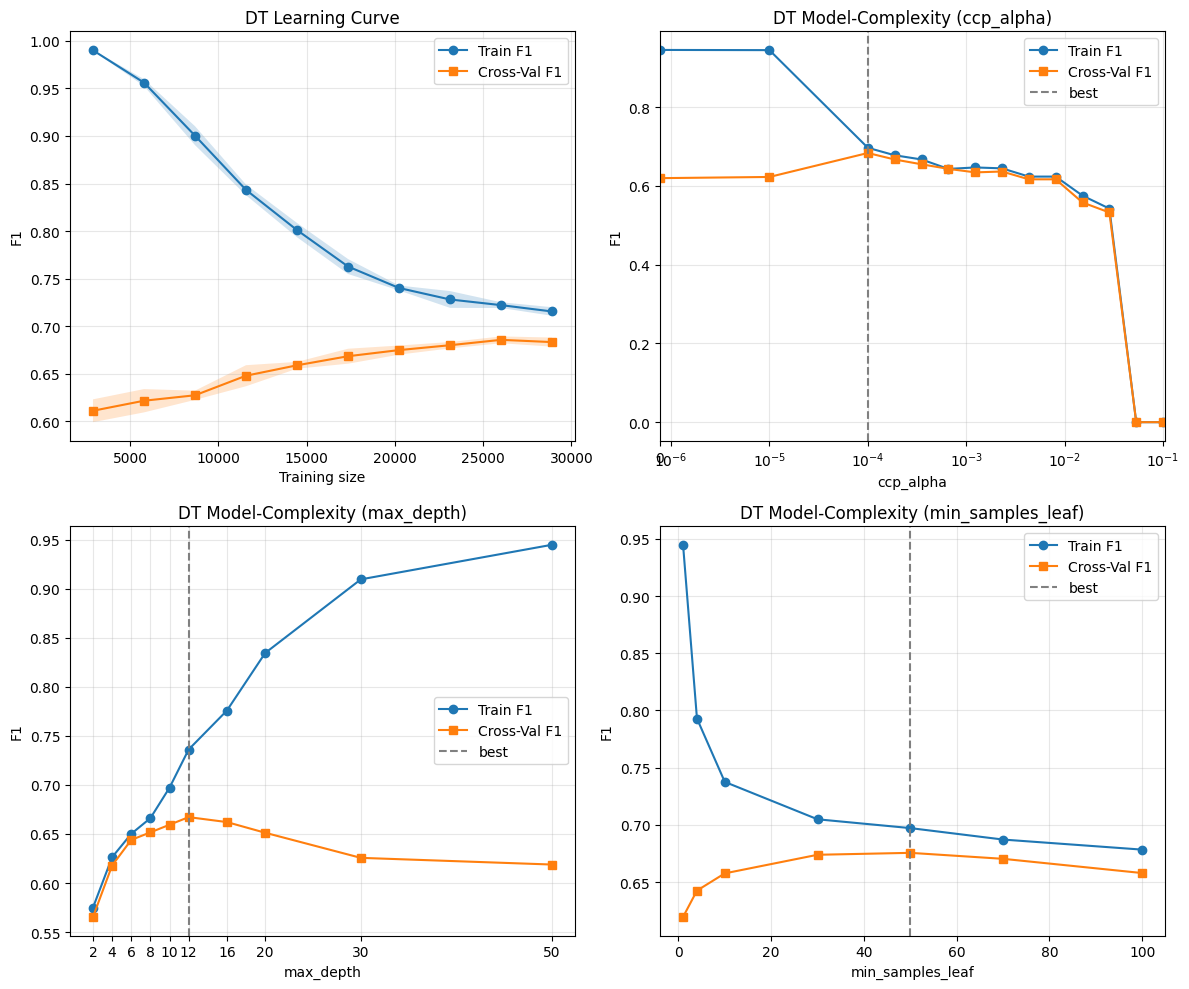

--- Best from each model-complexity curve (other params at standard) ---
  ccp_alpha curve (max_depth=None, min_samples_leaf=1): best ccp_alpha=0.000100, CV F1=0.6833
  max_depth curve (ccp_alpha=0, min_samples_leaf=1):     best max_depth=12, CV F1=0.6672
  min_samples_leaf curve (ccp_alpha=0, max_depth=None):  best min_samples_leaf=50, CV F1=0.6755
--- Grid-search best (joint tuning) ---
  CV F1=0.6837, params={'ccp_alpha': 9.999999999999999e-05, 'max_depth': 30, 'min_samples_leaf': 1}

Best params (used for final model): {'criterion': 'gini', 'ccp_alpha': 9.999999999999999e-05, 'max_depth': 30, 'min_samples_leaf': 1}
Test metrics: {'accuracy': 0.8589928057553957, 'f1': 0.6771414090217942, 'pr_auc': 0.7904097950971055}
Depth: 19 | Leaves: 121
Runtime - fit: 0.1463 s | predict: 0.0013 s

Confusion matrix (0=<=50K, 1=>50K):
[6425, 370]
[904, 1336]


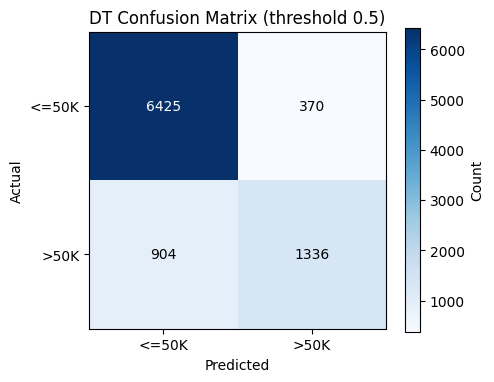

Saved: /home/ubuntu/ml-supervised-project1/outputs/dt_confusion_matrix.png

Results saved to: /home/ubuntu/ml-supervised-project1/DT_results.txt


In [4]:
from utils import set_seed
from models_dt import run_dt

set_seed()
dt_results = run_dt(X_train, y_train, X_test, y_test)

### Decision Tree with class_weight='balanced'

Same pipeline as above, but with `class_weight='balanced'` to handle class imbalance. Results and plots use suffix `_class_weight` so you can compare.

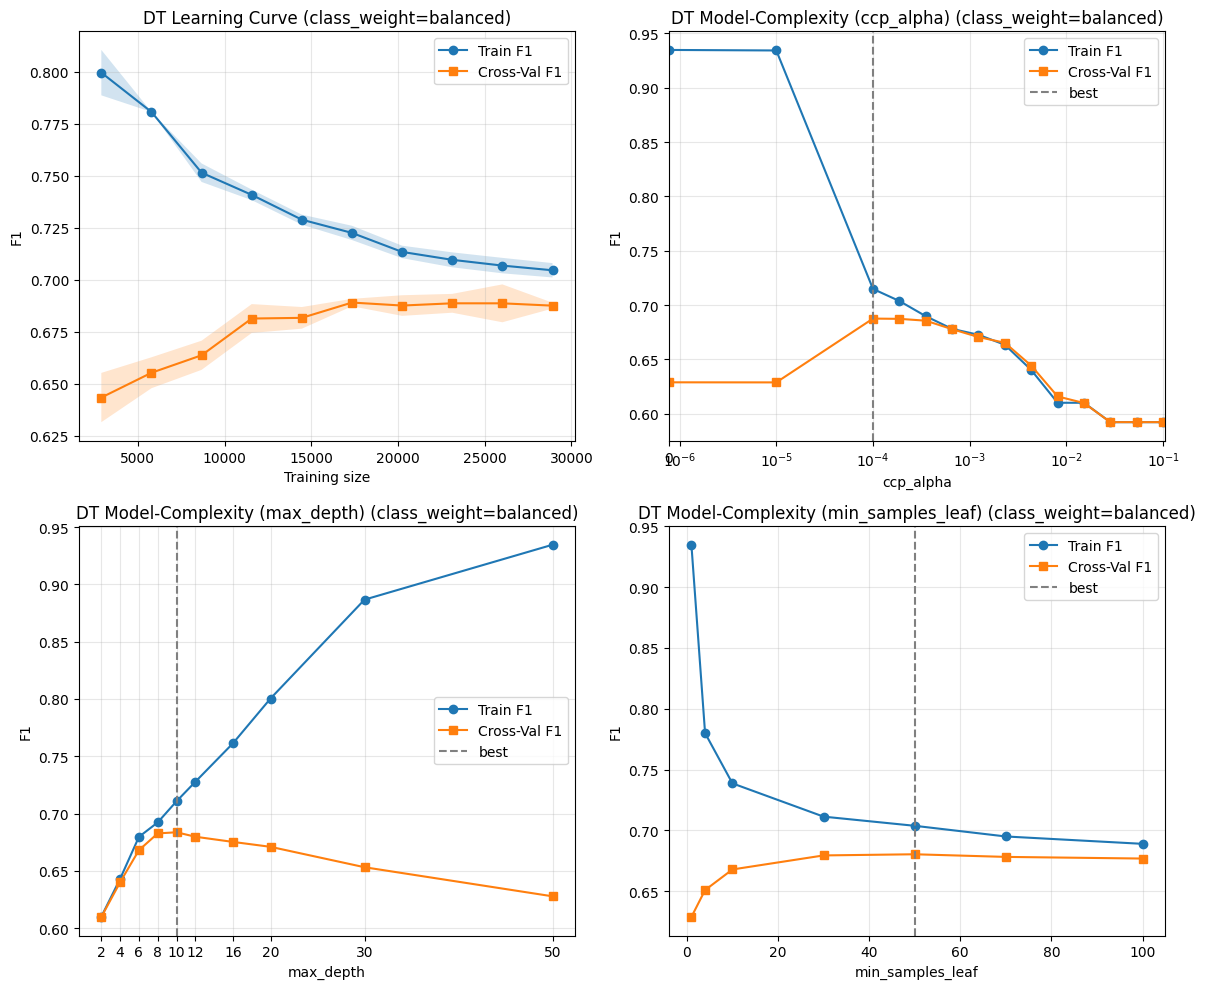

--- Best from each model-complexity curve (other params at standard) ---
  ccp_alpha curve (max_depth=None, min_samples_leaf=1): best ccp_alpha=0.000100, CV F1=0.6875
  max_depth curve (ccp_alpha=0, min_samples_leaf=1):     best max_depth=10, CV F1=0.6837
  min_samples_leaf curve (ccp_alpha=0, max_depth=None):  best min_samples_leaf=50, CV F1=0.6804
--- Grid-search best (joint tuning) ---
  CV F1=0.6888, params={'ccp_alpha': 0.0001873817422860383, 'max_depth': 20, 'min_samples_leaf': 4}

Best params (used for final model): {'criterion': 'gini', 'ccp_alpha': 0.0001873817422860383, 'max_depth': 20, 'min_samples_leaf': 4}
Test metrics: {'accuracy': 0.8132816823464305, 'f1': 0.6914212548015365, 'pr_auc': 0.7745799033463006}
Depth: 18 | Leaves: 91
Runtime - fit: 0.1275 s | predict: 0.0011 s

Confusion matrix (0=<=50K, 1=>50K):
[5458, 1337]
[350, 1890]


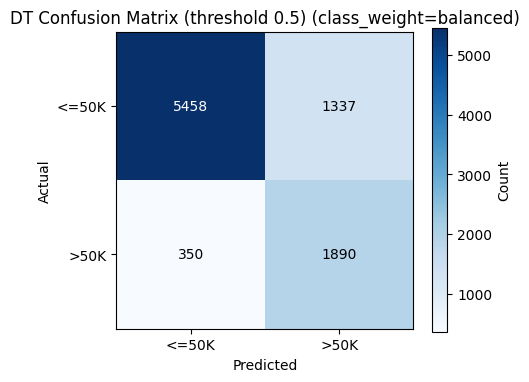

Saved: /home/ubuntu/ml-supervised-project1/outputs/dt_confusion_matrix_class_weight.png

Results saved to: /home/ubuntu/ml-supervised-project1/DT_results_class_weight.txt


In [5]:
dt_results_cw = run_dt(X_train, y_train, X_test, y_test, class_weight='balanced')

### 5.2 k-Nearest Neighbors

/home/ubuntu/ml-supervised-project1/models_knn.py:94: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(k_vals, results["weights_metric_curves"][key], "o-",
/home/ubuntu/ml-supervised-project1/models_knn.py:97: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(k_vals, results["train_f1_curves"][key], "s-",


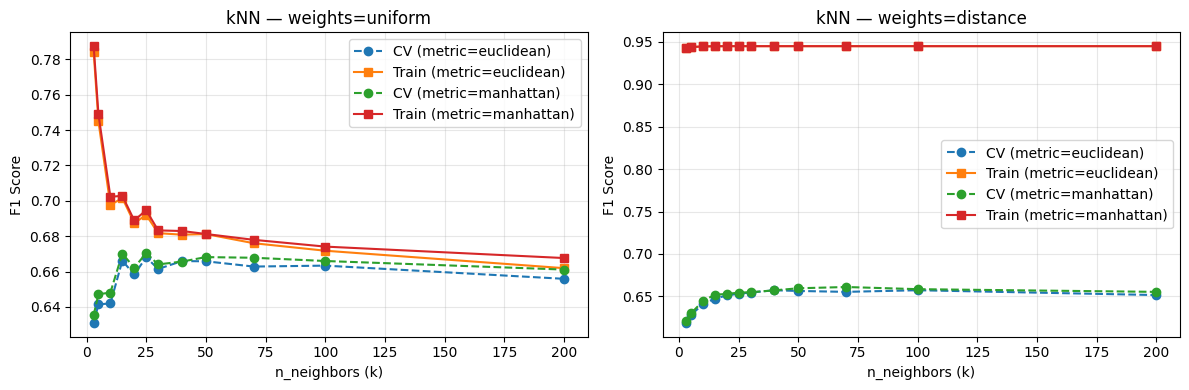

--- kNN: Model-complexity (weights × metric, CV F1 vs k) ---
k_values: [3, 5, 10, 15, 20, 25, 30, 40, 50, 70, 100, 200]
CV F1 at k=20:
  weights=uniform, metric=euclidean: 0.6583
  weights=uniform, metric=manhattan: 0.6622
  weights=distance, metric=euclidean: 0.6511
  weights=distance, metric=manhattan: 0.6528
Best (k, weights, metric): {'k': 25, 'weights': 'uniform', 'metric': 'manhattan'} | best_cv_f1: 0.6704
Results saved to: /home/ubuntu/ml-supervised-project1/KNN_results.txt


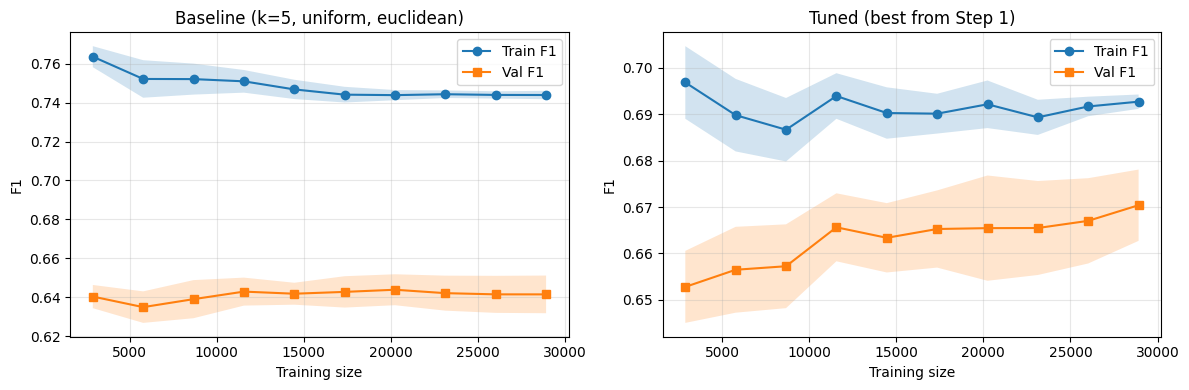

--- kNN Step 2: Learning curves ---
train_sizes: [2891, 5782, 8673, 11564, 14456, 17347, 20238, 23129, 26020, 28912]
Baseline (k=5): val_f1_mean: [0.6403, 0.6349, 0.639, 0.6429, 0.6418, 0.6427, 0.6438, 0.6421, 0.6415, 0.6414]
Tuned: {'k': 25, 'weights': 'uniform', 'metric': 'manhattan'} val_f1_mean: [0.6528, 0.6565, 0.6572, 0.6656, 0.6634, 0.6653, 0.6655, 0.6655, 0.667, 0.6704]
Appended to: /home/ubuntu/ml-supervised-project1/KNN_results.txt


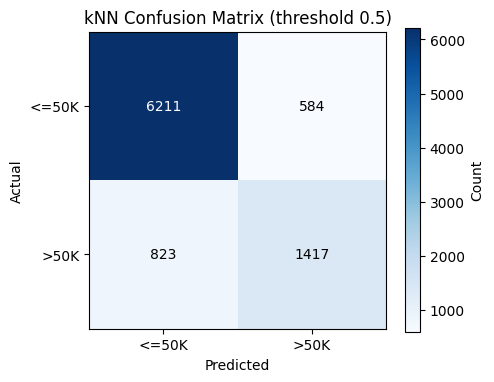

Saved: /home/ubuntu/ml-supervised-project1/outputs/knn_confusion_matrix.png
--- kNN Step 3: Test evaluation ---
Best config: {'k': 25, 'weights': 'uniform', 'metric': 'manhattan'}
Test metrics: {'accuracy': 0.8442722744881018, 'f1': 0.6682386229662816, 'pr_auc': 0.7379659362156504}
Runtime - fit (s): 0.0085 | predict (s): 1.9016
Confusion matrix (0=<=50K, 1=>50K): [[6211, 584], [823, 1417]]
Appended to: /home/ubuntu/ml-supervised-project1/KNN_results.txt


In [3]:
from utils import set_seed
from models_knn import run_knn_step2, run_knn_learning_curves, run_knn_test_eval

set_seed()
knn_results = run_knn_step2(X_train, y_train, X_test, y_test)
knn_lc_results = run_knn_learning_curves(X_train, y_train, X_test, y_test, best_config=knn_results["best_k_weights_metric"])
knn_test_results = run_knn_test_eval(X_train, y_train, X_test, y_test, best_config=knn_results["best_k_weights_metric"])

### 5.3 Support Vector Machines (linear + RBF)

SVM linear (C):   0%|          | 0/6 [00:00<?, ?it/s]

/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-

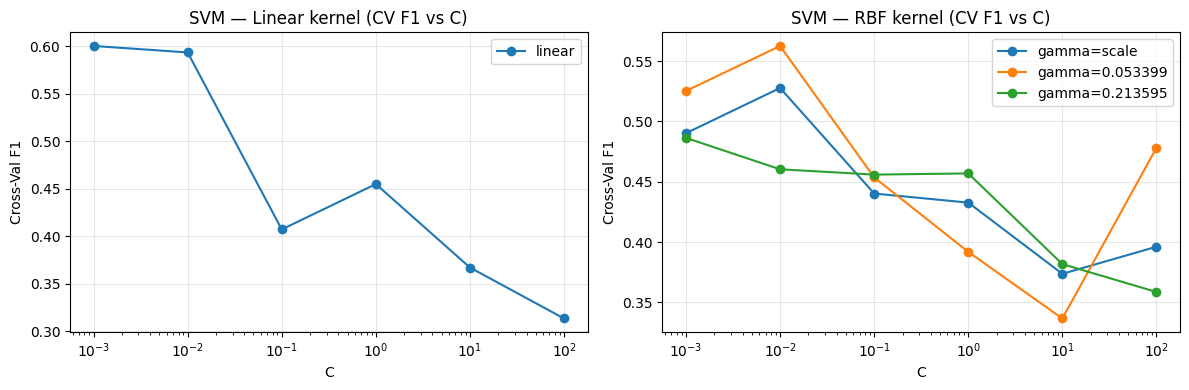

Saved: /home/ubuntu/ml-supervised-project1/outputs/svm_model_complexity.png
--- SVM Step 1: Model-complexity (linear vs RBF, CV F1 vs C) ---
Linear — CV F1 at C= 1 : 0.45504235479918365
RBF gamma=scale — CV F1: [0.4903, 0.5277, 0.4403, 0.4327, 0.3737, 0.3962]
RBF gamma=0.053399 — CV F1: [0.5253, 0.5625, 0.4536, 0.3919, 0.3367, 0.4782]
RBF gamma=0.213595 — CV F1: [0.4864, 0.4603, 0.456, 0.4569, 0.3818, 0.3587]
Best config: {'kernel': 'linear', 'C': 0.001, 'gamma': None} | best_cv_f1: 0.6005
Results saved to: /home/ubuntu/ml-supervised-project1/SVM_results.txt


SVM learning curves:   0%|          | 0/2 [00:00<?, ?it/s]/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with Standar

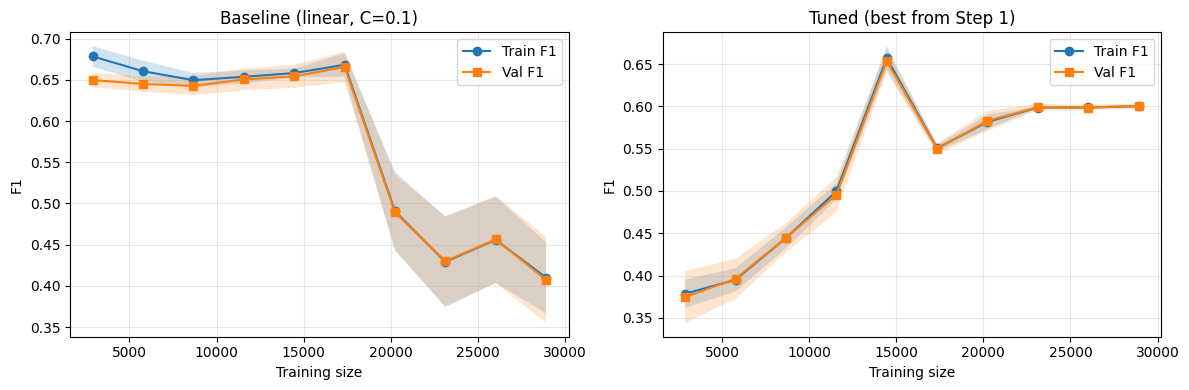

Saved: /home/ubuntu/ml-supervised-project1/outputs/svm_learning_curves.png
--- SVM Step 2: Learning curves ---
train_sizes: [2891, 5782, 8673, 11564, 14456, 17347, 20238, 23129, 26020, 28912]
Baseline (linear C=0.1): val_f1_mean: [0.6497, 0.6449, 0.6426, 0.6504, 0.6542, 0.6657, 0.4893, 0.4301, 0.4564, 0.4073]
Tuned: {'kernel': 'linear', 'C': 0.001, 'gamma': None} val_f1_mean: [0.3745, 0.3962, 0.4447, 0.4954, 0.6534, 0.5499, 0.5829, 0.599, 0.5986, 0.6005]
Appended to: /home/ubuntu/ml-supervised-project1/SVM_results.txt


/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


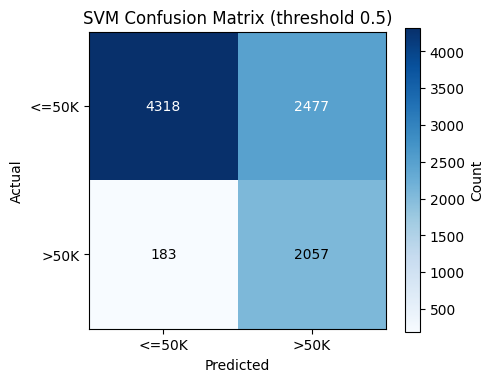

Saved: /home/ubuntu/ml-supervised-project1/outputs/svm_confusion_matrix.png
--- SVM Step 3: Test evaluation ---
Best config: {'kernel': 'linear', 'C': 0.001, 'gamma': None}
Test metrics: {'accuracy': 0.7055893746541229, 'f1': 0.6073221139651609, 'pr_auc': 0.5796735784133029}
Runtime - fit (s): 29.5972 | predict (s): 1.5294
Confusion matrix (0=<=50K, 1=>50K): [[4318, 2477], [183, 2057]]
Appended to: /home/ubuntu/ml-supervised-project1/SVM_results.txt


In [4]:
from utils import set_seed
from models_svm import run_svm_step1, run_svm_learning_curves, run_svm_test_eval

set_seed()
svm_results = run_svm_step1(X_train, y_train, X_test, y_test)
svm_lc_results = run_svm_learning_curves(X_train, y_train, X_test, y_test, best_config=svm_results["best_config"])
svm_test_results = run_svm_test_eval(X_train, y_train, X_test, y_test, best_config=svm_results["best_config"])

### SVM with class_weight='balanced'

Same pipeline (Step 1 model-complexity, Step 2 learning curves, Step 3 test eval) with `class_weight='balanced'`. Plots and results file use suffix `_class_weight`.

SVM linear (C):   0%|          | 0/6 [00:00<?, ?it/s]/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScal

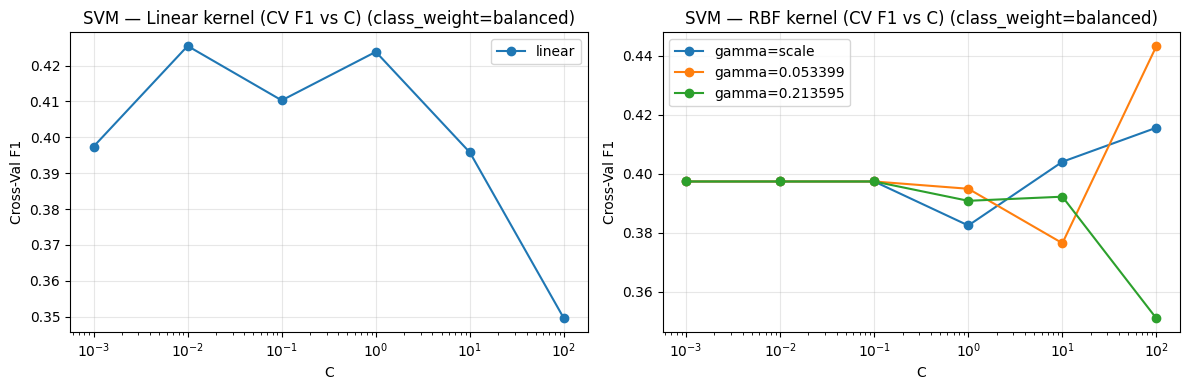

Saved: /home/ubuntu/ml-supervised-project1/outputs/svm_model_complexity_class_weight.png
--- SVM Step 1: Model-complexity (linear vs RBF, CV F1 vs C) ---
Linear — CV F1 at C= 1 : 0.4238502240932161
RBF gamma=scale — CV F1: [0.3974, 0.3974, 0.3974, 0.3825, 0.4041, 0.4156]
RBF gamma=0.053399 — CV F1: [0.3974, 0.3974, 0.3974, 0.3949, 0.3765, 0.4433]
RBF gamma=0.213595 — CV F1: [0.3974, 0.3974, 0.3974, 0.3909, 0.3923, 0.351]
Best config: {'kernel': 'rbf', 'C': 100, 'gamma': 0.053399} | best_cv_f1: 0.4433
Results saved to: /home/ubuntu/ml-supervised-project1/SVM_results_class_weight.txt


SVM learning curves:   0%|          | 0/2 [00:00<?, ?it/s]/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with Standar

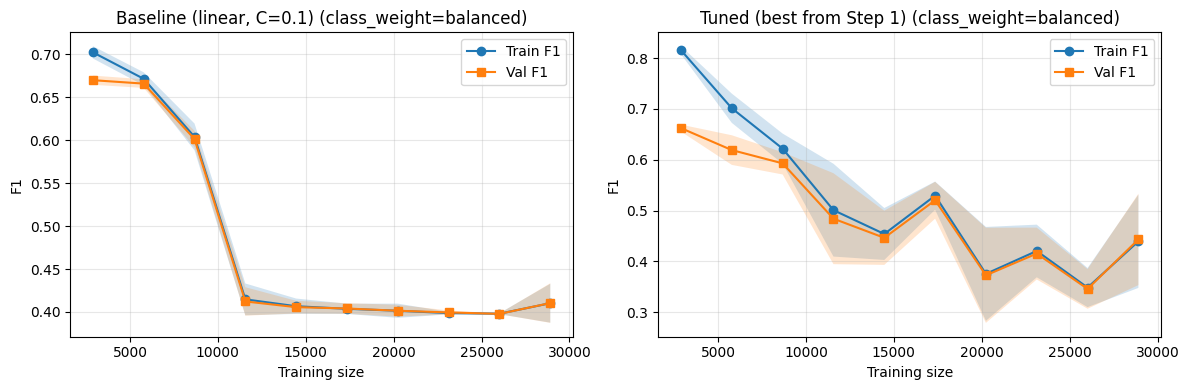

Saved: /home/ubuntu/ml-supervised-project1/outputs/svm_learning_curves_class_weight.png
--- SVM Step 2: Learning curves ---
train_sizes: [2891, 5782, 8673, 11564, 14456, 17347, 20238, 23129, 26020, 28912]
Baseline (linear C=0.1): val_f1_mean: [0.67, 0.666, 0.6014, 0.4122, 0.4056, 0.404, 0.4014, 0.3994, 0.3977, 0.4103]
Tuned: {'kernel': 'rbf', 'C': 100, 'gamma': 0.053399} val_f1_mean: [0.6622, 0.619, 0.5929, 0.4841, 0.4465, 0.5204, 0.3727, 0.4155, 0.3459, 0.4433]
Appended to: /home/ubuntu/ml-supervised-project1/SVM_results_class_weight.txt


/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/sklearn/svm/_base.py:313: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


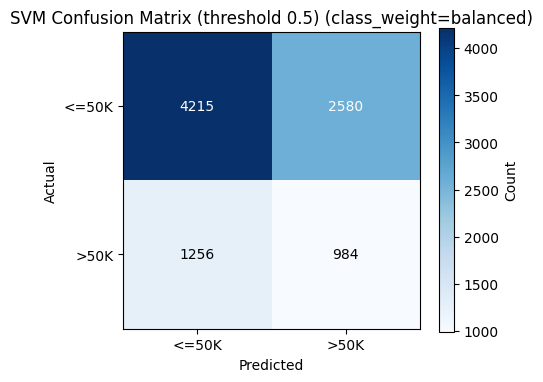

Saved: /home/ubuntu/ml-supervised-project1/outputs/svm_confusion_matrix_class_weight.png
--- SVM Step 3: Test evaluation ---
Best config: {'kernel': 'rbf', 'C': 100, 'gamma': 0.053399}
Test metrics: {'accuracy': 0.5754288876591035, 'f1': 0.3390764989662302, 'pr_auc': 0.2803924540051166}
Runtime - fit (s): 32.3987 | predict (s): 3.5272
Confusion matrix (0=<=50K, 1=>50K): [[4215, 2580], [1256, 984]]
Appended to: /home/ubuntu/ml-supervised-project1/SVM_results_class_weight.txt


In [5]:
svm_results_cw = run_svm_step1(X_train, y_train, X_test, y_test, class_weight='balanced')
svm_lc_results_cw = run_svm_learning_curves(X_train, y_train, X_test, y_test, best_config=svm_results_cw["best_config"], class_weight='balanced')
svm_test_results_cw = run_svm_test_eval(X_train, y_train, X_test, y_test, best_config=svm_results_cw["best_config"], class_weight='balanced')

### 5.4 Neural Network — scikit-learn (SGD only)

Removed 47 duplicate row(s). Dataset: 45222 -> 45175 rows.
Train: 36140, Test: 9035


NN width sweep: 100%|██████████| 40/40 [00:02<00:00, 17.00it/s]


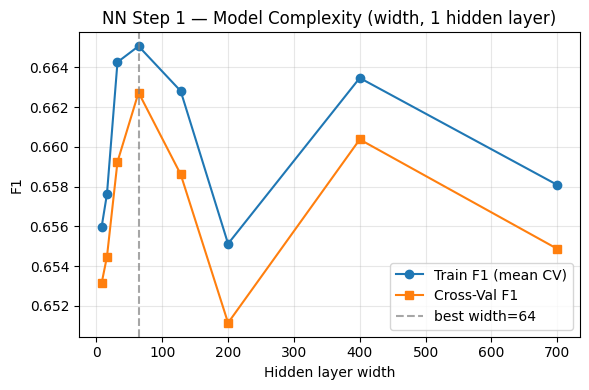

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_width_model_complexity.png
Step 1 best width: 64
Appended to: /home/ubuntu/ml-supervised-project1/NN_sklearn_results.txt


NN step2 depth sweep: 100%|██████████| 15/15 [00:00<00:00, 31663.09it/s]


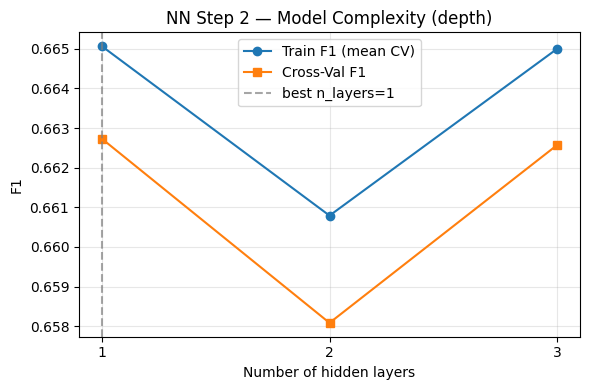

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_depth_model_complexity.png
Step 2 best architecture: [64]
Appended to: /home/ubuntu/ml-supervised-project1/NN_sklearn_results.txt


NN step3 LR sweep: 100%|██████████| 20/20 [00:00<00:00, 23007.70it/s]


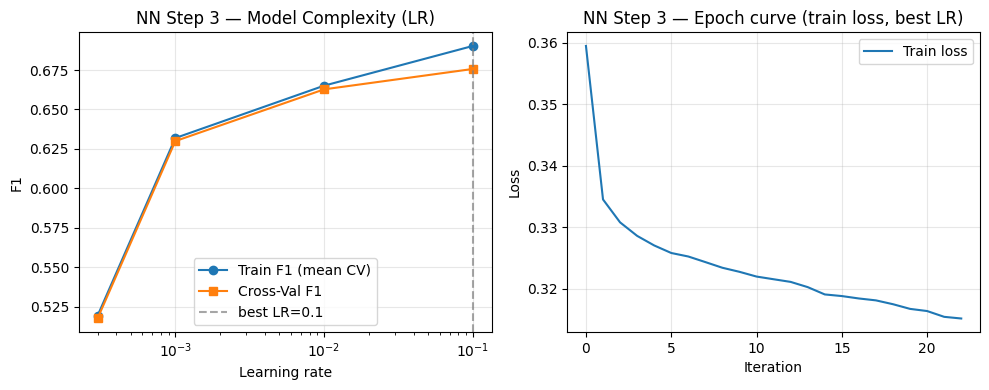

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_lr_curves.png
Step 3 best LR: 0.1
Appended to: /home/ubuntu/ml-supervised-project1/NN_sklearn_results.txt
Best model — architecture: [64] | LR: 0.1


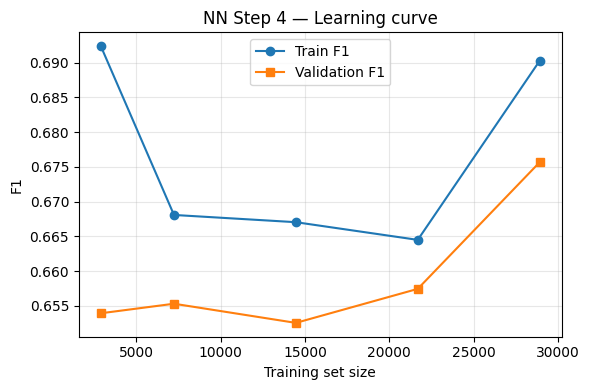

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_learning_curve.png


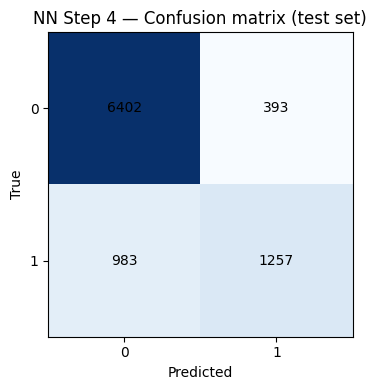

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_confusion_matrix.png
Step 4 done. Test F1: 0.6463 | Fit time: 1.738 s


In [3]:
from utils import set_seed
from preprocessing import get_dataset
from models_nn_sklearn import run_nn_step1, run_nn_step2, run_nn_step3, run_nn_step4

set_seed()
X_train, y_train, X_test, y_test = get_dataset()
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")

# Step 1: Width sweep (1 hidden layer), model complexity curve → best width
nn_step1 = run_nn_step1(X_train, y_train, X_test, y_test)

# Step 2: Depth vs width [64], [32,32], [16,16,16,16] → best architecture
nn_step2 = run_nn_step2(X_train, y_train, X_test, y_test, nn_step1)

# Step 3: LR sweep with best architecture → best LR; epoch curve
nn_step3 = run_nn_step3(X_train, y_train, X_test, y_test, nn_step2)

# Step 4: Final model — learning curve, confusion matrix, runtime, test set metrics
nn_step4 = run_nn_step4(X_train, y_train, X_test, y_test, nn_step3)

# All results saved to NN_sklearn_results.txt

### NN (sklearn) with class weighting (sample_weight='balanced')

Same 4-step pipeline with `use_class_weight=True`. MLPClassifier does not support `class_weight`; we use `sample_weight` from `sklearn.utils.class_weight.compute_sample_weight('balanced', y)` in every `fit()`. Plots and results use suffix `_class_weight`.

NN width sweep: 100%|██████████| 40/40 [00:01<00:00, 36.04it/s]


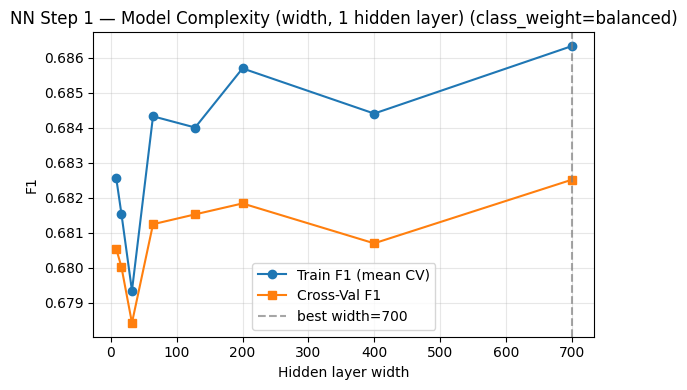

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_width_model_complexity_class_weight.png
Step 1 best width: 700
Appended to: /home/ubuntu/ml-supervised-project1/NN_sklearn_results_class_weight.txt


NN step2 depth sweep: 100%|██████████| 15/15 [00:00<00:00, 28846.66it/s]


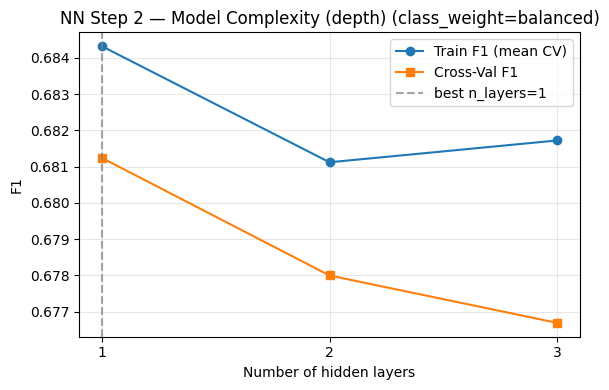

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_depth_model_complexity_class_weight.png
Step 2 best architecture: [64]
Appended to: /home/ubuntu/ml-supervised-project1/NN_sklearn_results_class_weight.txt


NN step3 LR sweep: 100%|██████████| 20/20 [00:00<00:00, 22525.80it/s]


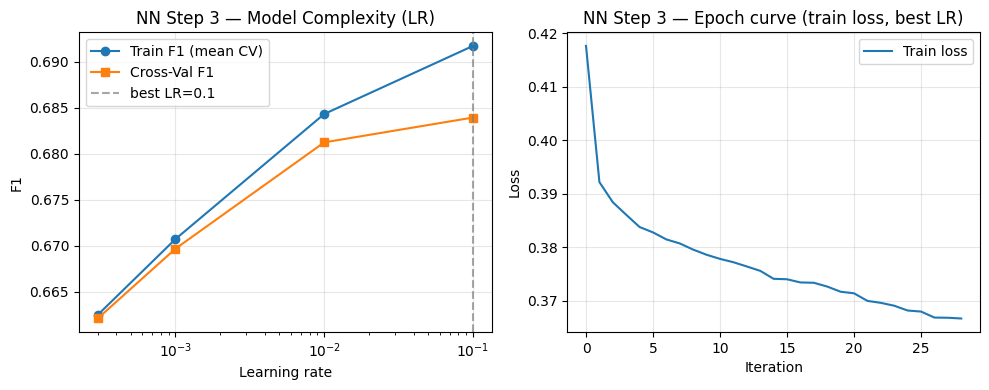

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_lr_curves_class_weight.png
Step 3 best LR: 0.1
Appended to: /home/ubuntu/ml-supervised-project1/NN_sklearn_results_class_weight.txt
Best model — architecture: [64] | LR: 0.1


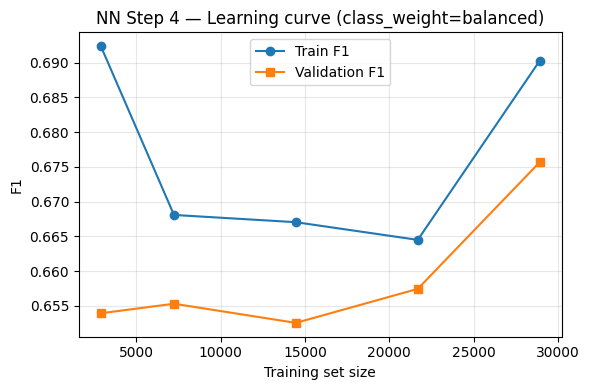

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_learning_curve_class_weight.png


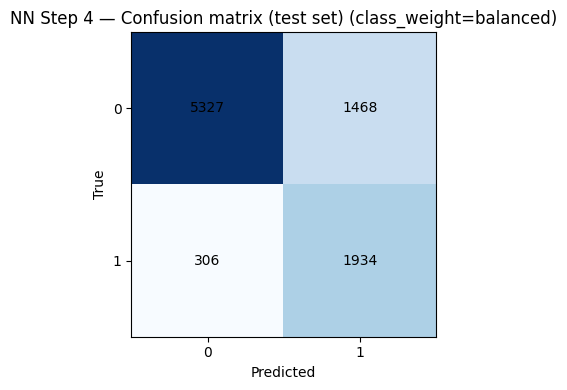

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_confusion_matrix_class_weight.png
Step 4 done. Test F1: 0.6856 | Fit time: 2.352 s


In [4]:
nn_step1_cw = run_nn_step1(X_train, y_train, X_test, y_test, use_class_weight=True)
nn_step2_cw = run_nn_step2(X_train, y_train, X_test, y_test, nn_step1_cw)
nn_step3_cw = run_nn_step3(X_train, y_train, X_test, y_test, nn_step2_cw)
nn_step4_cw = run_nn_step4(X_train, y_train, X_test, y_test, nn_step3_cw)

### 5.5 Neural Network — PyTorch (SGD only)

NN Step1 width:   0%|          | 0/40 [00:00<?, ?it/s]

NN Step1 width: 100%|██████████| 40/40 [00:05<00:00,  7.24it/s]
/home/ubuntu/ml-supervised-project1/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


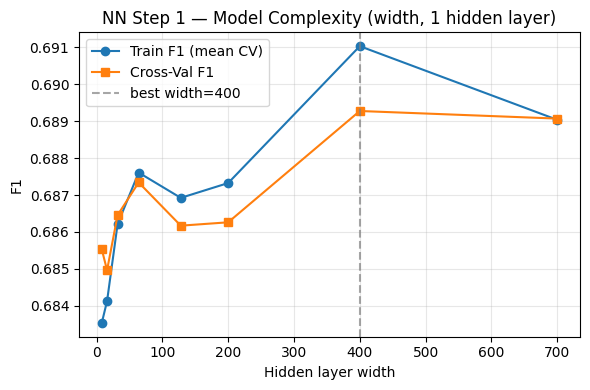

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_width_model_complexity_pytorch_class_weight.png
Step 1 best width: 400


NN Step2 depth: 100%|██████████| 15/15 [00:00<00:00, 30630.26it/s]


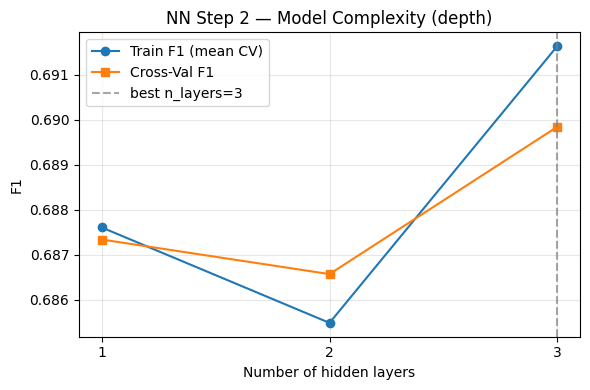

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_depth_model_complexity_pytorch_class_weight.png


NN Step3 LR: 100%|██████████| 20/20 [00:00<00:00, 4214.53it/s]


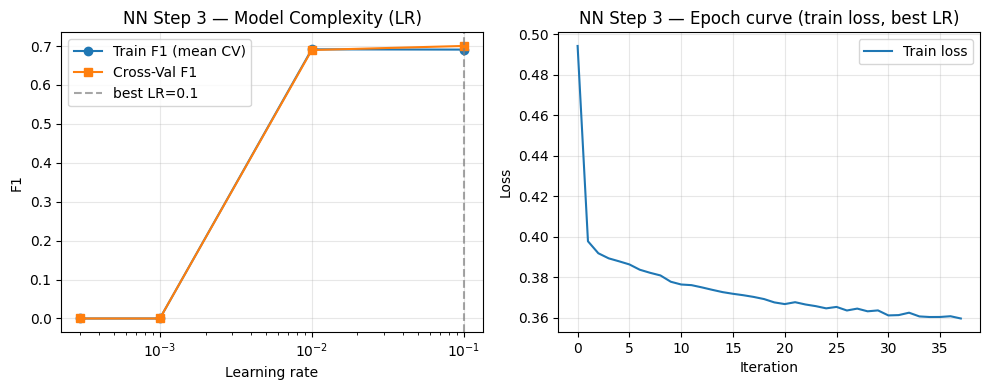

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_lr_curves_pytorch_class_weight.png


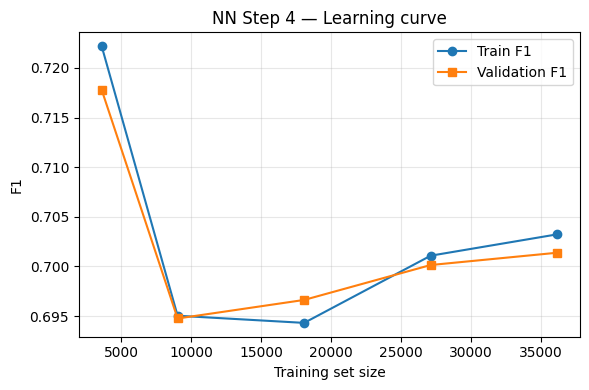

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_learning_curve_pytorch_class_weight.png


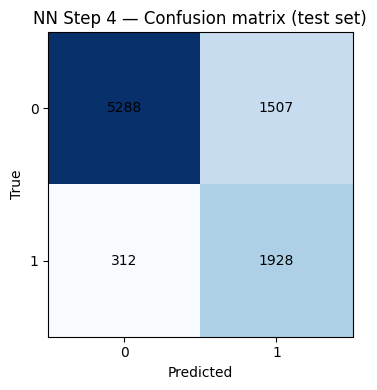

Saved: /home/ubuntu/ml-supervised-project1/outputs/nn_confusion_matrix_pytorch_class_weight.png
Step 4 done. Test F1: 0.6795 | Fit time: 93.836 s


In [5]:
from models_nn_pytorch import run_nn_step1, run_nn_step2, run_nn_step3, run_nn_step4

set_seed()
# PyTorch NN with class_weight balanced (same pipeline as sklearn)
nn_pt_step1 = run_nn_step1(X_train, y_train, X_test, y_test)
nn_pt_step2 = run_nn_step2(X_train, y_train, X_test, y_test, nn_pt_step1)
nn_pt_step3 = run_nn_step3(X_train, y_train, X_test, y_test, nn_pt_step2)
nn_pt_step4 = run_nn_step4(X_train, y_train, X_test, y_test, nn_pt_step3)

---
## 6. Cross-model comparison

Compare algorithms: metric vs runtime, stability vs capacity, sensitivity to hyperparameters, preprocessing effects. Tie to course concepts.

*Tables and short code for comparison; discussion in markdown.*

---
## 7. Interpretation and conclusion

- Evaluate whether results support or contradict hypotheses.
- Type I/II errors at chosen operating point.
- What we learned about model behavior on this dataset.
- One realistic next step.

*Write analysis in paragraphs with coherent reasoning.*